## Анализ популярности компьютерных игр

<a name="data"></a>
### Шаг 1. Изучим общую информацию

In [2]:
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Вывод

В данных **16715** объектов с **11** признаками, среди которых 6 категориальных признака - название игры, плафторма, год выпуска, жанр, оценка критиков, рейтинг; и 5 количественных непрерывных признаков - продажи (в Америке, Европе, Японии и других странах) и оценка пользователей.

В данных есть пропущенные значения.

In [4]:
missing_values = games.isnull().sum()
missing_values = missing_values[missing_values>0].sort_values(ascending=False)
missing_values_perc = round(missing_values/len(games)*100, 2)
print(f"\nКоличество пропущенных значений, %:\n{missing_values_perc}")
print("\nОбщая доля пропущенных значений: {:.2%}".format(missing_values.sum()/games.size))


Количество пропущенных значений, %:
Critic_Score       51.32
Rating             40.48
User_Score         40.09
Year_of_Release     1.61
Genre               0.01
Name                0.01
dtype: float64

Общая доля пропущенных значений: 12.14%


<a name="preprocess"></a>
### Шаг 2. Подготовьте данные

Заменим названия столбцов, приведем текущие называния к нижнему регистру.

In [6]:
games.columns = games.columns.str.lower()

#### name

In [7]:
games[games['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Для двух игр неизвестно их назавние и жанр, удалим эти строки. Так как по имеющеимся данным сложно восстановить, что это были за игры. Также видно, что выручка от продажи этих игр совсем небольшая.

In [8]:
games.dropna(subset=['name'], inplace=True)

Приведем названия, жанры и платформы игр к строковому типу.

In [9]:
games['name'] = games['name'].astype(str)
games['platform'] = games['platform'].astype(str)
games['genre'] = games['genre'].astype(str)

In [10]:
games[games['year_of_release'].isnull()]['name'].unique()[:5]

array(['Madden NFL 2004', 'FIFA Soccer 2004',
       'LEGO Batman: The Videogame', 'wwe Smackdown vs. Raw 2006',
       'Space Invaders'], dtype=object)

В некоторых случаях по названию игры можно понять, в каком году игра была выпущена. Можно сделать лемматизацию названия и попробовать достать год из названия. Оставлю это в качестве задания со звездочкой. 

Если в исходном файле с данными перед годом поставить запятую, то он может правильно попасть в столбец с годом выпуска.

Пока пропуски в годе выпуска оставлю.

#### user_score

In [11]:
games['user_score'].describe()

count     10014
unique       96
top         tbd
freq       2424
Name: user_score, dtype: object

Оценка пользователей "tbd" - это аббревиатура выражения To be determined. Это значит, что для определения пользовательской оценки пока недостаточно отзывов с оценками. Заменим это значение на NaN с помощью np.NaN.

In [12]:
games.loc[games['user_score'] =='tbd', 'user_score'] = np.NaN

Привидем оценку пользователей к вещественному типу.

In [13]:
games['user_score'] = games['user_score'].astype(float)

Посчитаем суммарные продажи во всех регионах и запишим их в отдельный столбец.

In [14]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

In [15]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


### Вывод

- В данных обнаружено около 12% пропущенных значений. Мы не можем их восстановить, оставляем как есть и работаем с тем, что есть. 

- Названия столбцов были приведены к нижнему регистру. 

- Были удалены две строки с неизвестными названиями игр.

- Значения To be determined были заменены на NaN, так как фактически пользовательский рейтинг в данных случаях ещё неизвестен. user_score был приведен к вещестенному типу.

- Были посчитаны суммарные продажи во всех регионах, для данных значений был создан отдельный столбец total_sales.

<a name="analysis"></a>
### Шаг 3. Проведите исследовательский анализ данных

*а) Посмотрим, сколько игр выпускалось в разные годы. Подумаем, важны ли данные за все периоды?*

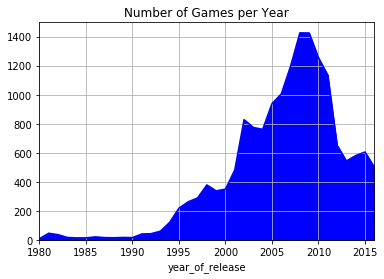

In [16]:
games.pivot_table(index='year_of_release', values='name', aggfunc='count')\
     .plot(grid=True, kind='area', title='Number of Games per Year', legend='', colormap='winter')
plt.show()

- Видим, что до 1995 года выпусклоась менее 200 игр ежегодно. Этот период для нашей задачи точно не является важным.

- С 1995 до 2008 гг. количетсво игр, выпускаемых за год, выросло  до 1400.

- С 2008 год количество игр, выпускаемых за год, снижалось.

- В 2016 году было выпущено около 500 игр примерно как и в 2001 году.

*б) Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. Выясним, за какой характерный срок появляются новые и исчезают старые платформы?*

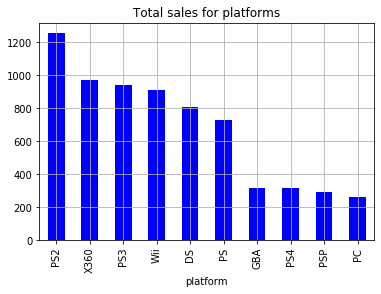

In [19]:
games.pivot_table(index='platform',values='total_sales', aggfunc='sum')\
     .reset_index()\
     .sort_values(by='total_sales', ascending=False)[:10]\
     .plot(grid=True, kind='bar', x='platform', title='Total sales for platforms', legend='', colormap='winter')
plt.show()

- Видим, что на рынке видео-игр есть/была платформа-лидер, PS2, для нее было продано игр на сумму более 1.2 млрд долларов.

- Далее пятерка платформ, X360, PS3, Wii, DS и PS, для которых было продано видео-игр на сумму от 700 млн до 1 млрд долларов для каждой.

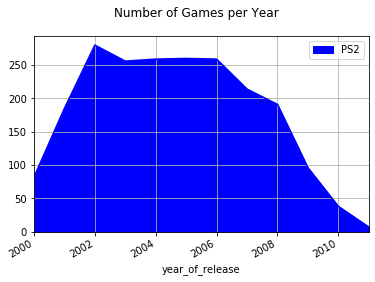

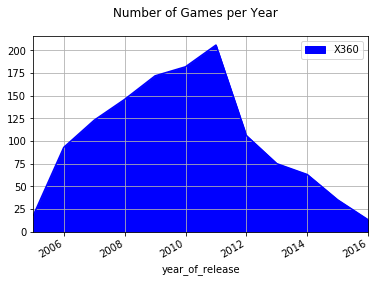

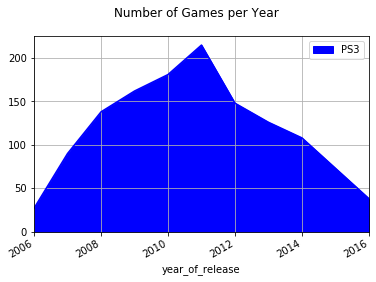

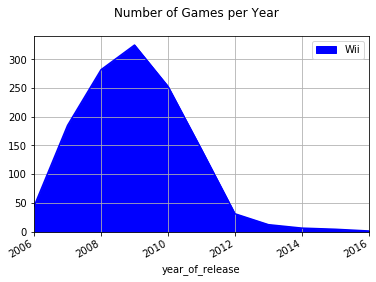

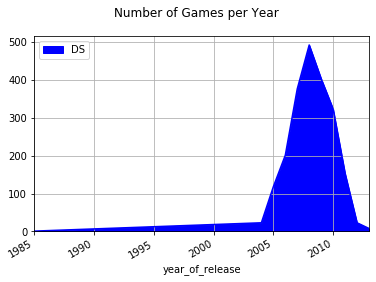

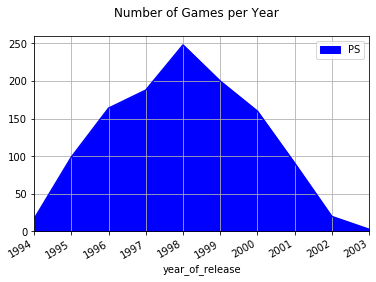

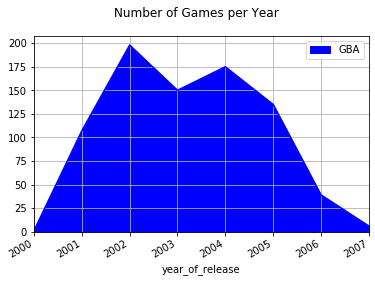

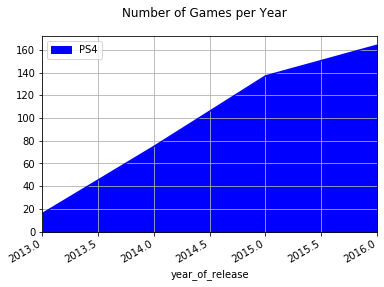

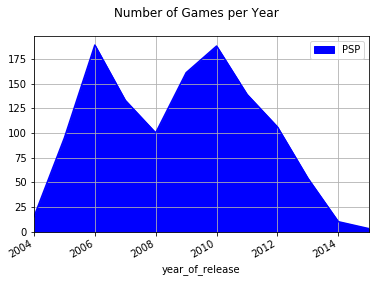

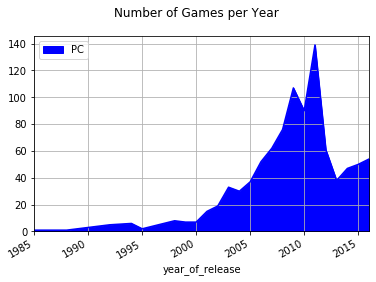

In [20]:
platform_list = games.pivot_table(index='platform', values='total_sales', aggfunc='sum')\
                     .reset_index()\
                     .sort_values(by='total_sales', ascending=False)['platform'][:10]\
                     .tolist()

for platform in platform_list:
    games.query('platform == @platform')\
         .pivot_table(index='year_of_release', columns='platform', values='name', aggfunc='count')\
         .plot(subplots=True, grid=True, kind='area', title='Number of Games per Year', colormap='winter')

- Видим, что самая популярная по суммарным продажам платформа - PS2 - была предсталвена на рынке 10 лет, с 2000 по 2011 года. Ее продажи выросли почти в 3 раза с 2000 по 2002, держались на одном уровне до 2006 и потом начали падать.

- Вторая по пулярности платформа X360 существует на рынке с 2005 года по настоящее время (я представила, что сейчас декабрь 2016 года). Пик ее продаж - 2011 год. Сейчас продажи вернулись на стартовый уровень, как в 2005 году.

- Далее PS3 - на рынке с 2006 года. Пик продаж - 2011 год. Сейчас продажи вернулись на стартовый уровень, как в 2006 году.

- Wii четвертая по полярности платформа с пиком продаж в 2009 году, сейчас почти не продается. Выпускается 10 лет, с 2006 года.

- Платформа DS, старейшая/взрослейшая среди данных шести, просуществовала с 1985 года до 2011, 26 лет, пик продаж - 2008 год.

- PS была представлена на рынке около 9 лет с 1994 года по 2003, пик продаж - 1998 год.


- 10 лет - характерная длина жизни платформы, за этот срок появляются новые и исчезают старые платформы, хорошо видно на примере с серией PS.

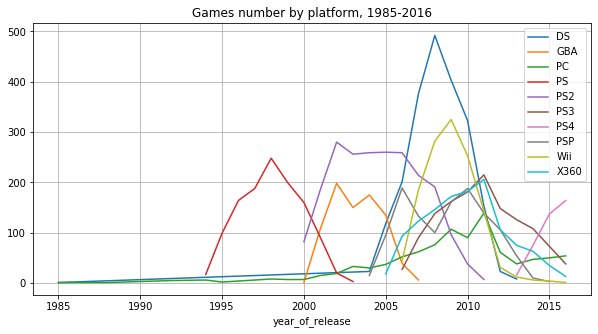

In [21]:
data1 = games.query('platform in @platform_list')\
            .pivot_table(index='year_of_release', columns='platform', values='name', aggfunc='count')

plt.figure(figsize=(10,5))
sns.lineplot(data=data1, dashes=False)
plt.grid(True)
plt.title('Games number by platform, 1985-2016')
plt.show()

- Четвёрка прибыльных плафторм по производству игр, существующих в настоящее время - PS4, PC, PS3, X360.

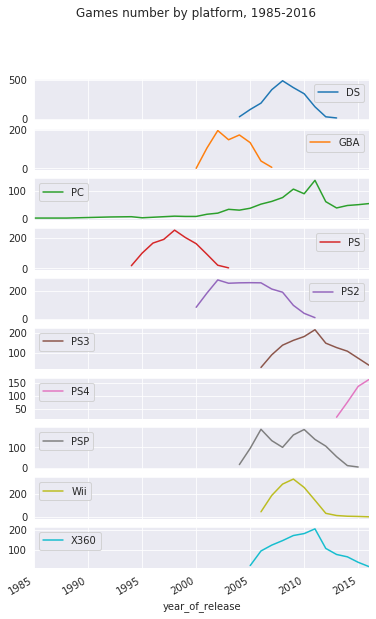

In [29]:
sns.set_style('darkgrid')
data1.plot(subplots=True, figsize=(6, 10), title='Games number by platform, 1985-2016') 
plt.show()

*в) Возьмем данные за соответствующий актуальный период 10 лет, с 2006 года. И не будем учитывайте в работе данные за предыдущие годы. Найдем потенциально прибыльне платформы - важно построить прогноз на 2017 год.*

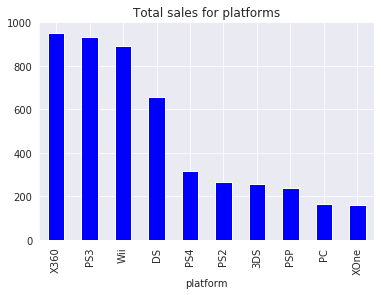

In [30]:
games = games.query('year_of_release >= 2006.00')
games.pivot_table(index='platform',values='total_sales', aggfunc='sum')\
     .reset_index()\
     .sort_values(by='total_sales', ascending=False)[:10]\
     .plot(grid=True, kind='bar', x='platform', title='Total sales for platforms', legend='', colormap='winter')
plt.show()

- Если смотреть на актуальный период 10 последних лет с 2006 года, определяется следующая пятёрка лидеров: X360, PS3, Wii, DS, PS4 с суммартными продажами от 300 млн до 1 млрд.

- Далее следуют PS2, 3DS, PSP, PC, XOne.

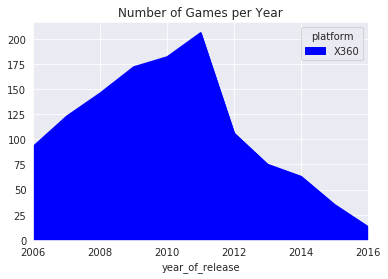

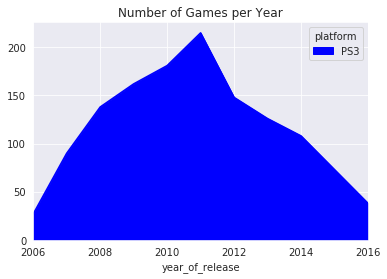

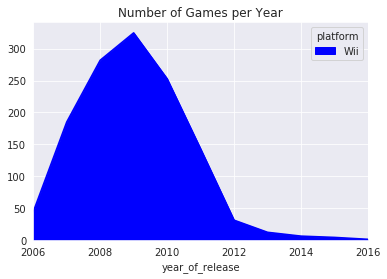

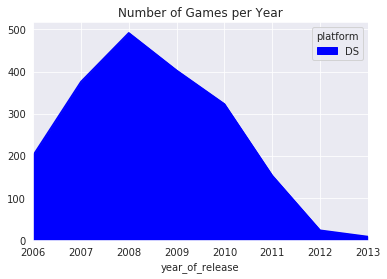

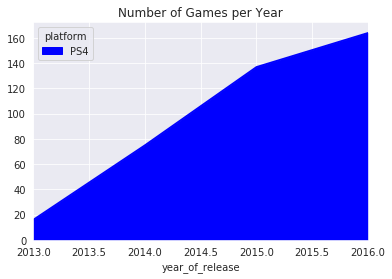

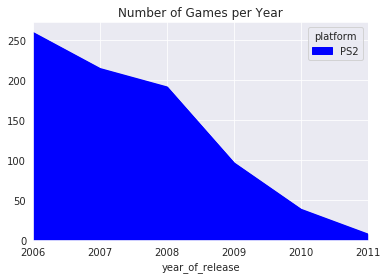

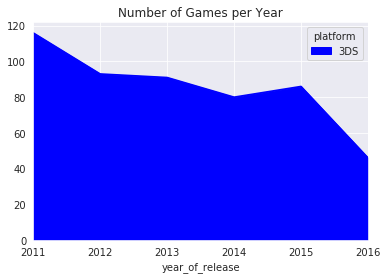

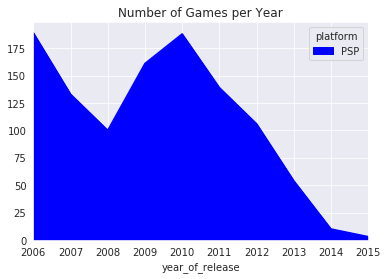

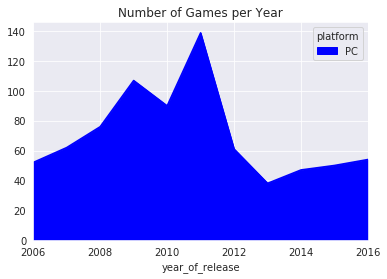

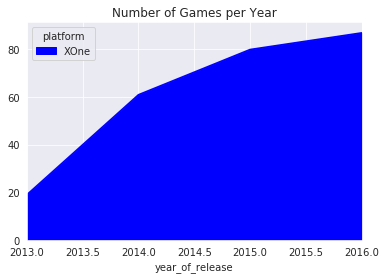

In [31]:
platform_list = games.pivot_table(index='platform', values='total_sales', aggfunc='sum')\
                     .reset_index()\
                     .sort_values(by='total_sales', ascending=False)['platform'][:10]\
                     .tolist()

for platform in platform_list:
    games.query('platform == @platform')\
         .pivot_table(index='year_of_release', columns='platform', values='name', aggfunc='count')\
         .plot(grid=True, kind='area', title='Number of Games per Year', colormap='winter')

- Для PS4, XOne, PC производство игр выросло c 2013 года до 160, 90, 55 к 2016 году.

- Для 3DS, PS3, X360 производство игр упало до 50, 45, 15 к 2016 году.

- Для остальных платформ  Wii, DS, PS2, PSP к 2016 году производтся не более 10 игр.

- **Таким образом потенциально прибыльными в 2017 году скорее всего будет платформы PS4, XOne, PC, 3DS, PS3, X360**.

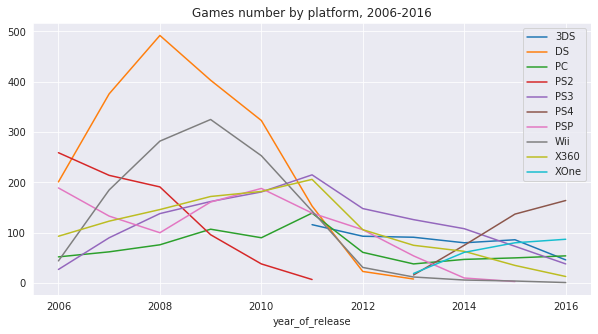

In [32]:
data2 = games.query('platform in @platform_list')\
            .pivot_table(index='year_of_release', columns='platform', values='name', aggfunc='count')

plt.figure(figsize=(10,5))
sns.lineplot(data=data2, dashes=False)
plt.grid(True)
plt.title('Games number by platform, 2006-2016')
plt.show()

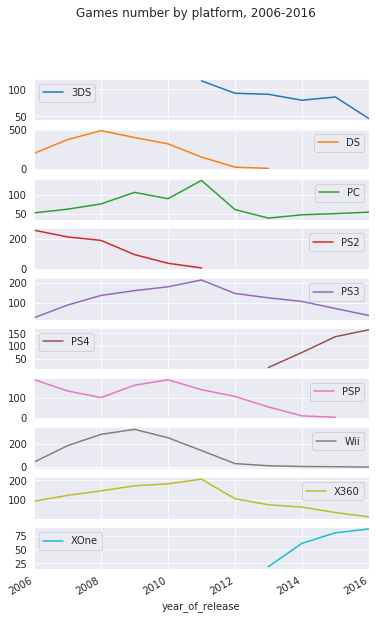

In [34]:
sns.set_style('darkgrid')
data2.plot(subplots=True, figsize=(6, 10), title='Games number by platform, 2006-2016') 
plt.show()

*г) Постройте график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам. Велика ли разница в продажах? А в средних продажах на разных платформах?*

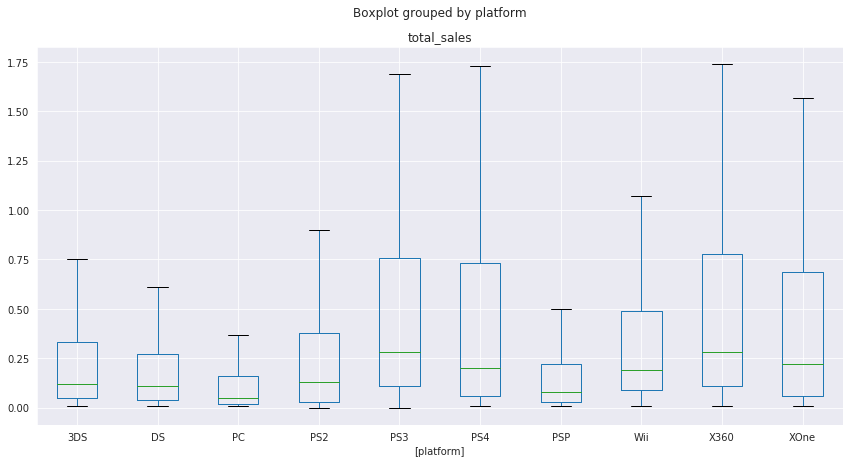

In [35]:
games.query('platform in @platform_list')\
     .pivot_table(index=['platform', 'name'], values='total_sales', aggfunc='sum')\
     .sort_values('total_sales', ascending=False)\
     .boxplot(by='platform', figsize=(14, 7), showfliers=False)
plt.show()

- Самые больше продажи игр у платформ PS4, X360, PS3, XOne, Wii. 

- Для всех платформ медианные продажи меннее 0.3 млн долларов.

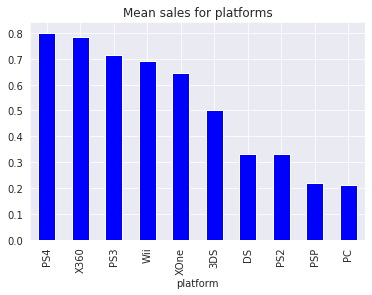

In [36]:
games.query('platform in @platform_list')\
     .groupby(['platform', 'name'])['total_sales'].sum().to_frame().reset_index()\
     .groupby('platform')['total_sales'].mean().sort_values(ascending=False).to_frame().reset_index()\
     .plot(grid=True, kind='bar', x='platform', title='Mean sales for platforms', legend='', colormap='winter')
plt.show()

- Средние продажи различаются заметнее так как в данных есть очень большие значения: если для PS4 и X360 они составляют около 0.8 млн долларов, то для PC,например, средние продажи чуть более 0.2 млн долларов. 

*д) Посмотрим, как влияют на продажи внутри самой популярной платформы PS4 отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируем выводы.*

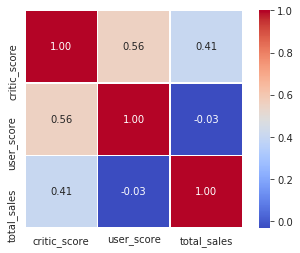

In [37]:
corr = games.query('platform == "PS4"')[['critic_score', 'user_score', 'total_sales']].corr()

sns.heatmap(corr, annot=True, linewidths=.3, fmt= '.2f', cmap='coolwarm', square=True)

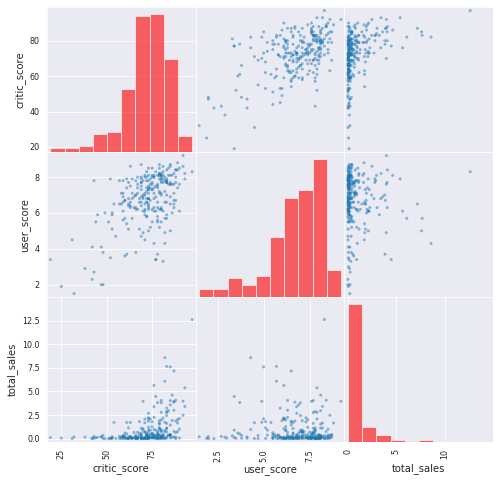

In [38]:
scatter_matrix(games.query('platform == "PS4"')[['critic_score', 'user_score', 'total_sales']],\
              figsize=(8, 8), hist_kwds = {'color': 'red', 'bins': 10, 'alpha': 0.6})
plt.show()

- (0, 0) гисторамма critic_score - большинство оценок в диапозоне от 60 до 80;

- (1, 0) между critic_score и user_scor прямая связь, коэффициент корреляции, кк, 0.56;

- (1, 1) гисторамма user_score - большинство оценок в диапозоне от 6 до 8;

- (2, 0) между total_score и critic_score есть прямая связь, кк 0.41;

- (2, 1) между total_score и user_score нет связи, кк  - 0.03;

- (2, 2) гисторгамма total_scores - в основном суммарный продажи составляют до 1 млн долларов.

- Получается на между уровнем продаж и оценкой критиков есть прямая связь, чем выше оценка критиков, тем больше ожидается продаж. Странно, что связи между оценкой пользователей и суммарными продажами нет.

In [31]:
st.spearmanr(games.query('platform == "PS4"')['user_score'], games.query('platform == "PS4"')['total_sales'], nan_policy='omit')

SpearmanrResult(correlation=-0.028340257414850134, pvalue=0.6511213035798787)

Коэффициент коррреляции Спирмена около 0, значит, линейной свзяи между пользовательской оценкой и суммарными продажами нет.  

*е) Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?*

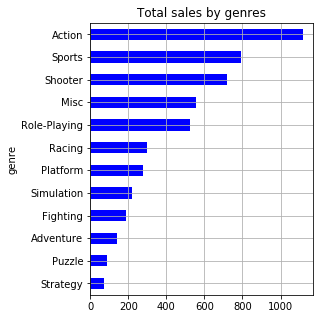

In [32]:
games.pivot_table(index=['genre'], values='total_sales', aggfunc='sum')\
     .sort_values('total_sales', ascending=True)\
     .plot(kind='barh', grid=True, colormap='winter', legend='', title = 'Total sales by genres', figsize=(4,5))
plt.show()

- Самые популярные/прибыльные жанры это Action, Sports, Shooter, Role-Playing, Racing.


- Жанры с самыми низкими продажами: Adventure, Puzzle, Strategy.

### Вывод

- Уидели, что до 1995 года выпускалось менее 200 игр ежегодно. С 1995 до 2008 гг. количетсво игр, выпускаемых за год, выросло до 1400. После пика в 2008 год количество игр, выпускаемых за год, снижалось. В 2016 году было выпущено около 500 игр - это примерно как и в 2001 году. Самая популярная по суммарным продажам за всю доступную историю платформа - PS2 - была предсталвена на рынке 10 лет, с 2000 по 2011 года (продажи более 1.2 млрд долларов).


- Заметили на примере серии PS, что 10 лет - характерная длина жизни платформы, за этот срок появляются новые и исчезают старые платформы.


- Выбрали актуальный период 10 лет, чтобы на основе только этих данных делать предсказания на следующий 2017 год. Для PS4, XOne, PC производство игр выросло c 2013 года до 160, 90, 55 к 2016 году. Для 3DS, PS3, X360 производство игр упало до 50, 45, 15 к 2016 году.Для остальных платформ  Wii, DS, PS2, PSP к 2016 году производтся не более 10 игр.

- **Таким образом потенциально прибыльными в 2017 году скорее всего будет платформы PS4, XOne, PC, 3DS, PS3, X360**.


- Увидели, что для всех платформ средние продажи меннее 0.3 млн долларов.


- Выявили, что для самой популярной платформы PS4 между уровнем продаж и оценкой критиков есть прямая связь, чем выше оценка критиков, тем больше суммарные продажи. Странно, но для данной выборки связь между оценкой пользователей и суммарными продажами отсутсвует.


- Выделили самые популярные жанры Action, Sports, Shooter, Role_Playing, Racing и самые низко прибыльные Adventure, Puzzle, Strategy.

<a name="region"></a>
### Шаг 4. Составьте портрет пользователя каждого региона

*а) Определим для пользователя каждого региона (NA, EU, JP) самые популярные платформы (топ-5). Опишим различия в долях продаж.*

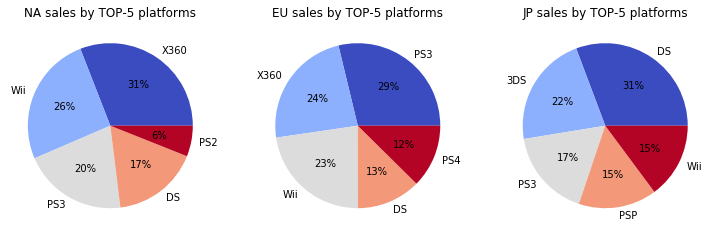

In [33]:
plt.figure(figsize=(17,6))

plt.subplot(1, 4, 1)
games.groupby('platform')['na_sales'].sum().sort_values(ascending=False)[:5]\
     .plot(kind='pie', colormap='coolwarm', title='NA sales by TOP-5 platforms', legend='', autopct='%1.0f%%')
plt.axis('off')
plt.subplot(1, 4, 2)
games.groupby('platform')['eu_sales'].sum().sort_values(ascending=False)[:5]\
     .plot(kind='pie', colormap='coolwarm', title='EU sales by TOP-5 platforms', autopct='%1.0f%%')
plt.axis('off')
plt.subplot(1, 4, 3)
games.groupby('platform')['jp_sales'].sum().sort_values(ascending=False)[:5]\
     .plot(kind='pie', colormap='coolwarm', title='JP sales by TOP-5 platforms', autopct='%1.0f%%')
plt.axis('off')
plt.show()

- В Северной Америке и Европе  а актуальный период (за последние 10 лет, 2006-2016 гг.) самая популярные платформы X360, Wii, PS3;


- в Японии самые популярные платформы DS, 3DS, PS3.

*б) Определим для пользователя каждого региона (NA, EU, JP) самые популярные жанры (топ-5). Поясним разницу.*

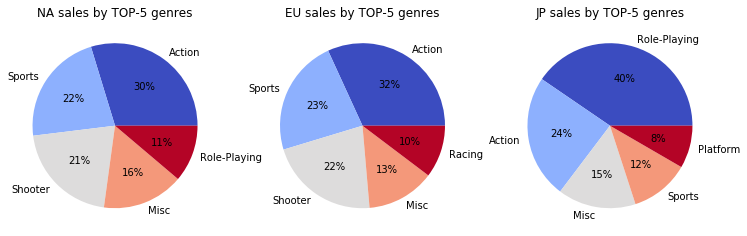

In [34]:
plt.figure(figsize=(17,6))

plt.subplot(1, 4, 1)
games.groupby('genre')['na_sales'].sum().sort_values(ascending=False)[:5]\
     .plot(kind='pie', colormap='coolwarm', title='NA sales by TOP-5 genres', legend='', autopct='%1.0f%%')
plt.axis('off')
plt.subplot(1, 4, 2)
games.groupby('genre')['eu_sales'].sum().sort_values(ascending=False)[:5]\
     .plot(kind='pie', colormap='coolwarm', title='EU sales by TOP-5 genres', autopct='%1.0f%%')
plt.axis('off')
plt.subplot(1, 4, 3)
games.groupby('genre')['jp_sales'].sum().sort_values(ascending=False)[:5]\
     .plot(kind='pie', colormap='coolwarm', title='JP sales by TOP-5 genres', autopct='%1.0f%%')
plt.axis('off')
plt.show()

- Для Северной Америки и Европы самые прибыльные/популярные жанры - это Action, Sport и Shooter. Тогда как в Японии самые прибльные/популярные жанры - это Role-Playing, Action.

*в) Посмотрим, влияет ли рейтинг ESRB на продажи в отдельном регионе?*

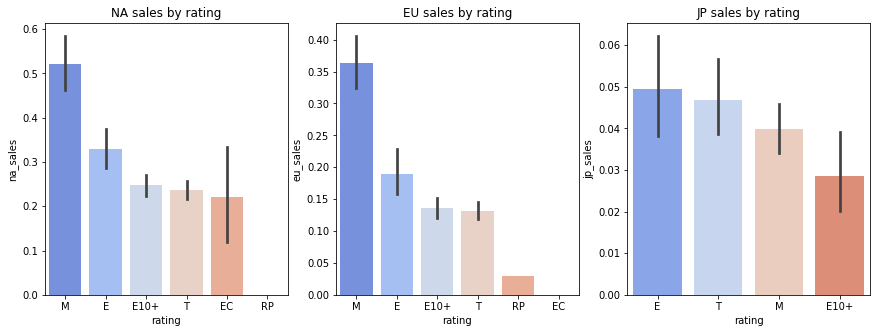

In [35]:
plt.figure(figsize=(20,5))

plt.subplot(1, 4, 1)
sns.barplot(x='rating', y='na_sales', data=games, palette="coolwarm", order=['M', 'E', 'E10+', 'T', 'EC', 'RP'])
plt.title('NA sales by rating')

plt.subplot(1, 4, 2)
sns.barplot(x='rating', y='eu_sales', data=games, palette="coolwarm", order=['M', 'E', 'E10+', 'T', 'RP', 'EC'])
plt.title('EU sales by rating')

plt.subplot(1, 4, 3)
sns.barplot(x='rating', y='jp_sales', data=games, palette="coolwarm", order=['E', 'T', 'M', 'E10+'])
plt.title('JP sales by rating')

plt.show()


- Тогда как в Северной Америке и Европе самые прибыльные игры - "Для взрослых" (M), в Японии самые прибыльные игры "Для всех"(E) и для "Подростков" (T).

### Вывод

- В Северной Америке за актуальный период топ-5 популярных платформ: X360, Wii, PS3, DS, PS2; топ-4 популярных жанров: Action, Sports, Shooter, Role-Playing; большинстов игр "Для взрослых" (рейтинг М).


- В Европе за актуальный период топ-5 популярных платформ: PS3, X360, Wii, DS, PS4; топ-4 популярных жанров: Action, Sports, Shooter, Racing; большинстов игр "Для взрослых" (рейтинг М).


- В Японии за акуальный период топ-5 популярных платформ: DS, 3DS, PS3, PSP, Wii; топ-4 популярных жанров: Role-Playing, Action, Sports и Platform; самые прибыльные игры "Для всех"(E) и для "Подростков" (T).


Видим, что пользователи в Северной Америке и Европе похожи.

<a name="hypothesis"></a>
### Шаг 5. Проверьте гипотезы

*а) Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;*

In [36]:
user_score_XOne = games[games['platform']=='XOne']['user_score']
user_score_PC = games[games['platform']=='PC']['user_score']

Нулевая гипотеза явлется преположением, что средние пользовательские рейтинги платформ XboxOne и PC одинаковые. Определим уровень значимости 5%.  Чтобы проверить гипотезу о равенств **средних** двух сгенеральных совокупностей по взятым из них выборкам, применим метод scipy.stats.ttest_ind().

In [37]:
alpha = 0.05

results = st.ttest_ind(user_score_XOne, user_score_PC, nan_policy="omit")
print('p-значение', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу. Скорее всего средние пользовательские рейтинги платформ XOne и PC различаются.')
else:
    print('Не можем отвергнуть нулевую гипотезу. Возможно, средние пользовательские рейтинги платформ XOne и PC не различаются.')

p-значение 0.014354742043410137
Отвергаем нулевую гипотезу. Скорее всего средние пользовательские рейтинги платформ XOne и PC различаются.


- При выбранном уровне значимости 5% отвергаем нулевую гипотезу. Скорее всего средние пользовательские рейтинги игр для плафторм XOne и PC различаются.

*б) Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.*

In [38]:
user_score_Action = games[games.genre=='Action']['user_score']
user_score_Sports = games[games.genre=='Sports']['user_score']

Нулевая гипотеза явлется преположением, что средние пользовательские рейтинги жанров Action и Sports одинаковые. Определим уровень значимости 5%.  Чтобы проверить гипотезу о равенстве двух генеральных совокупностей по взятым из них выборкам, применим метод scipy.stats.ttest_ind().

In [39]:
alpha = 0.01

results = st.ttest_ind(user_score_Action, user_score_Sports, nan_policy="omit")
print('p-значение', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу. Скорее всего средние пользовательские рейтинги жанров Action и Sports различаются.')
else:
    print('Не можем отвергнуть нулевую гипотезу. Возможно, средние пользовательские рейтинги жанров Action и Sports не различаются.')

p-значение 3.4931838159020617e-11
Отвергаем нулевую гипотезу. Скорее всего средние пользовательские рейтинги жанров Action и Sports различаются.


- При выбранном уровне значимости 1% можем отвергнуть нулевую гипотезу, скорее всего пользовательские рейтинги Action и Sports различаются.

<a name="summary"></a>
### Общий вывод

- Уидели, что до 1995 года выпускалось менее 200 игр ежегодно. С 1995 до 2008 гг. количетсво игр, выпускаемых за год, выросло до 1400. После пика в 2008 год количество игр, выпускаемых за год, снижалось. В 2016 году было выпущено около 500 игр - это примерно как и в 2001 году. Самая популярная по суммарным продажам за всю доступную историю платформа - PS2 - была предсталвена на рынке 10 лет, с 2000 по 2011 года (продажи более 1.2 млрд долларов).


- Заметили на примере серии PS, что 10 лет - характерная длина жизни платформы, за этот срок появляются новые и исчезают старые платформы.


- Выбрали актуальный период 10 лет, чтобы на основе только этих данных с 2006 по 2016 гг. делать предсказания на следующий 2017 год. Для PS4, XOne, PC производство игр выросло до 160, 90, 55 к 2016 году. Для 3DS, PS3, X360 производство игр упало до 50, 45, 15 к 2016 году. Для остальных платформ  Wii, DS, PS2, PSP к 2016 году производтся не более 10 игр.


- **Таким образом потенциально прибыльными в 2017 году скорее всего будет платформы PS4, XOne, PC, 3DS, PS3, X360**.


- **Выделили самые популярные жанры Action, Sports, Shooter, Role_Playing, Racing.**


- Увидели, что протреты пользователей Северной Америки и Европы похожи и отличаются от портета пользователя Японии.